# Load extension `blackcellmagic` for formatting

In [1]:
%load_ext blackcellmagic

# Module imports


In [2]:
import pandas as pd
import seaborn as sns
from scipy import stats

# Data pre-processing

### Read gene data

In [3]:
genes = pd.read_csv(
    "http://139.91.190.186/tei/bioinformatics/assignment.txt", sep="\t"
).iloc[:, 1:]

### Graph first 40 genes

<AxesSubplot:>

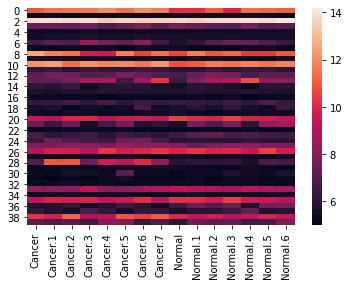

In [4]:
sns.heatmap(genes.iloc[:40])

# Data analysis

## Gene expression analysis using means

### Calculate Cancer class mean value

In [5]:
genes["Cancer.Mean"] = genes.filter(like="Cancer").mean(axis=1)

### Calculate Normal class mean value

In [6]:
genes["Normal.Mean"] = genes.filter(like="Normal").mean(axis=1)

### Calculate delta of Cancer and Normal mean values

In [7]:
genes["Means.Delta"] = genes["Cancer.Mean"] - genes["Normal.Mean"]

### Sort gene data based of Mean values delta

In [8]:
means_delta_sorted_genes = genes.sort_values(by="Means.Delta")

### Select first 20 and last 20 genes from sorted gene data

In [9]:
sliced_means_delta_sorted_genes = means_delta_sorted_genes.head(20).append(
    means_delta_sorted_genes.tail(20)
)

### Graph 40 gene slice

<AxesSubplot:>

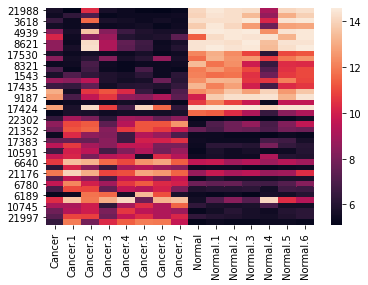

In [10]:
sns.heatmap(sliced_means_delta_sorted_genes.iloc[:, :-3])

## Gene expression analysis using p-value

### Select Cancer and Normal columns from sorted data

In [11]:
cancer_columns_w_mean = means_delta_sorted_genes.filter(like="Cancer")
cancer_columns_wo_mean = cancer_columns_w_mean.drop(columns='Cancer.Mean')
normal_columns_w_mean = means_delta_sorted_genes.filter(like="Normal")
normal_columns_wo_mean = normal_columns_w_mean.drop(columns='Normal.Mean')

### Calculate *p*-value for each gene

In [12]:
means_delta_sorted_genes["p-value"] = [
    stats.ttest_ind(
        cancer_columns_wo_mean.iloc[gene_index], normal_columns_wo_mean.iloc[gene_index]
    )[-1]
    for gene_index in range(genes.shape[0])
]
means_delta_sorted_genes

,Cancer,Cancer.1,Cancer.2,Cancer.3,Cancer.4,Cancer.5,Cancer.6,Cancer.7,Normal,Normal.1,Normal.2,Normal.3,Normal.4,Normal.5,Normal.6,Cancer.Mean,Normal.Mean,Means.Delta,p-value
21988,5.7,5.1,10.4,5.7,5.4,5.2,5.1,5.3,14.1,14.5,14.3,14.2,9.1,14.1,14.3,5.9875,13.514286,-7.526786,3.056538e-06
10276,5.5,6.3,7.0,5.3,5.4,5.4,5.4,5.5,14.0,14.4,14.3,13.4,8.6,13.1,13.9,5.7250,13.100000,-7.375000,2.268104e-07
3618,6.5,5.4,11.6,5.8,5.6,5.4,5.6,5.4,14.3,14.3,14.3,14.5,10.2,14.4,14.5,6.4125,13.785714,-7.373214,4.413585e-06
6966,5.6,5.4,5.9,5.4,5.5,5.6,5.3,5.5,13.8,14.5,14.1,12.7,7.7,12.8,12.9,5.5250,12.642857,-7.117857,7.650590e-07
4939,8.4,5.7,13.6,8.3,6.6,5.9,5.7,5.7,14.5,14.6,14.5,14.6,12.4,14.4,14.5,7.4875,14.214286,-6.726786,2.816093e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8027,10.4,13.6,11.9,13.1,14.1,7.7,13.2,13.5,5.6,7.1,8.4,7.2,14.1,10.4,9.3,12.1875,8.871429,3.316071,2.229200e-02
10745,9.1,9.1,9.9,6.3,9.0,10.4,9.2,11.5,6.3,5.8,5.7,5.8,6.9,5.6,5.6,9.3125,5.957143,3.355357,7.603606e-05
19551,7.8,9.3,9.9,8.1,10.6,9.5,9.2,8.8,5.3,5.6,6.1,5.7,5.5,6.0,6.2,9.1500,5.771429,3.378571,4.647075e-07
21997,7.3,10.9,10.8,7.8,9.7,10.4,9.2,10.2,6.3,6.0,5.9,5.7,5.6,5.9,6.2,9.5375,5.942857,3.594643,1.086885e-05


### Sort sorted data by *p*-value

In [15]:
pvalue_means_delta_sorted_genes = means_delta_sorted_genes.sort_values('p-value')

### Slice sorted data firstly by Means and secondly by *p*-value

In [23]:
sliced_pvalue_means_delta_sorted_genes = pvalue_means_delta_sorted_genes.head(20).append(pvalue_means_delta_sorted_genes.tail(20))

### Graph sliced data

<AxesSubplot:>

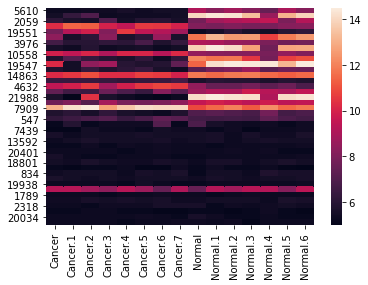

In [24]:
sns.heatmap(sliced_pvalue_means_delta_sorted_genes.iloc[:, :-4])

## Gene expression analysis using Bonferroni corrected p-value

## Gene expression analysis using q-value

# Data validation